In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [116]:
df = pd.read_csv("breast-cancer-diagnostic.csv")
df.drop(['id'], axis=1, inplace=True)
df.drop(['Unnamed: 32'], axis=1, inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [117]:
#there are no missing values

In [118]:
diagnosis_type = {'M': 1,'B': 2} 

In [119]:
df.diagnosis = [diagnosis_type[item] for item in df.diagnosis] 

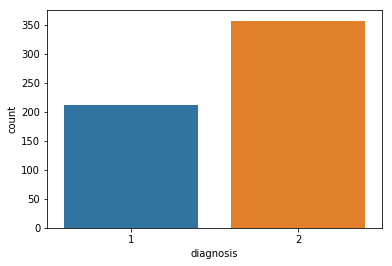

In [120]:
#Univariate analysis target.
sns.countplot(df['diagnosis']) #target feature is not balanced

In [121]:
#KNN

knn = KNeighborsClassifier()
x = df.drop(columns=['diagnosis'])
y = df['diagnosis']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [122]:
#Training the model.
knn.fit(x_train, y_train)
knn.fit(x_train, y_train)
knn.score(x_test, y_test)

0.9521276595744681

In [129]:
knn_best = KNeighborsClassifier(n_neighbors=13, p=2)
knn_best.fit(x_train, y_train)
score_noscale = knn_best.score(x_test, y_test)
score_noscale

0.9627659574468085

In [124]:
def cross_validate(x_train, y_train):
    neighbors = [] 
    cv_scores = [] 
  
    # perform 10 fold cross validation 
    for k in range(1, 51, 2): 
        neighbors.append(k) 
        knn = KNeighborsClassifier(n_neighbors = k) 
        scores = cross_val_score( 
            knn, x_train, y_train, cv = 10, scoring = 'accuracy') 
        cv_scores.append(scores.mean())
    return neighbors, cv_scores

In [125]:
def plotMSE(neighbors, cv_scores):
    MSE = [1-x for x in cv_scores] 
    # determining the best k 
    optimal_k = neighbors[MSE.index(min(MSE))] 
    print('The optimal number of neighbors is % d ' % optimal_k) 
    # plot misclassification error versus k 
    plt.figure(figsize = (10, 6)) 
    plt.plot(neighbors, MSE) 
    plt.xlabel('Number of neighbors') 
    plt.ylabel('Misclassification Error') 
    plt.show()

In [161]:
def optimalK(neighbors, cv_scores):
    MSE = [1-x for x in cv_scores] 
    # determining the best k 
    optimal_k = neighbors[MSE.index(min(MSE))]
    return optimal_k

The optimal number of neighbors is  13 


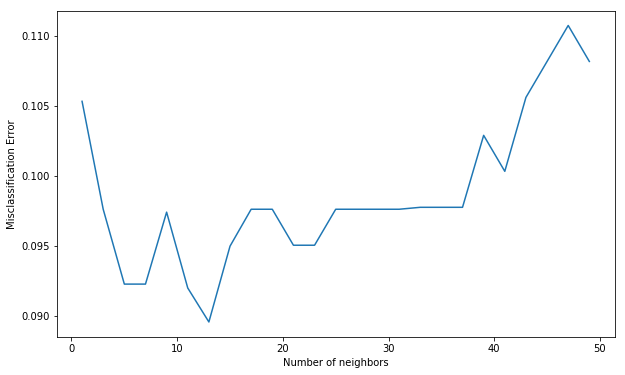

In [126]:
neigh, scores = cross_validate(x_train, y_train)
plotMSE(neigh, scores)

# Robust Scaling

In [96]:
#Create copy of dataset.
from sklearn.preprocessing import RobustScaler

df_copy = df.copy()
scaler = RobustScaler()

In [106]:
features = [[column for column in x.columns]]

In [107]:
for feature in features:
    df_copy[feature] = scaler.fit_transform(df_copy[feature])

In [109]:
x_copy = df_copy.drop(columns=['diagnosis'])
y_copy = df_copy['diagnosis']

In [110]:
x_trainS, x_testS, y_trainS, y_testS = train_test_split(x_copy, y_copy, test_size=0.33, random_state=42)

In [111]:
knn_S = KNeighborsClassifier(n_neighbors=13, p=2)
knn_S.fit(x_trainS, y_trainS)
knn_S.score(x_testS, y_testS)

0.9521276595744681

In [ ]:
#robust scaling reduced the accuracy
#find optimal k for scaled data

In [172]:
neigh, scores = cross_validate(x_trainS, y_trainS)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]
[0.9499671736513842, 0.9579366816208921, 0.9550953787795894, 0.9681219681219682, 0.9600849837691945, 0.9548856548856548, 0.954818178502389, 0.9522540759382865, 0.9471258708100813, 0.9523926760768866, 0.949828573512784, 0.949828573512784, 0.949828573512784, 0.9523926760768866, 0.9523926760768866, 0.9523926760768866, 0.9523926760768866, 0.949828573512784, 0.949828573512784, 0.9523926760768866, 0.9523926760768866, 0.949828573512784, 0.9472644709486815, 0.9421362658204764, 0.9395046868731078]


The optimal number of neighbors is  7 


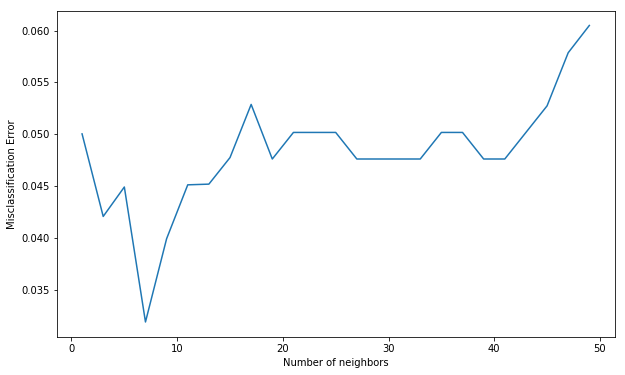

In [142]:
neigh, scores = cross_validate(x_trainS, y_trainS)
plotMSE(neigh, scores)

In [130]:
knn_S2 = KNeighborsClassifier(n_neighbors=7, p=2)
knn_S2.fit(x_trainS, y_trainS)
score_scaled = knn_S2.score(x_testS, y_testS)
score_scaled

0.973404255319149

In [136]:
((score_scaled-score_noscale)/score_noscale)*100

1.1049723756906151

In [137]:
#about a 1% increase in accuracy

# Min-Max Scaling

In [138]:
df_copy = df.copy()
scaler = MinMaxScaler()

In [106]:
features = [[column for column in x.columns]]

In [107]:
for feature in features:
    df_copy[feature] = scaler.fit_transform(df_copy[feature])

In [139]:
x_copy = df_copy.drop(columns=['diagnosis'])
y_copy = df_copy['diagnosis']

In [140]:
x_trainMS, x_testMS, y_trainMS, y_testMS = train_test_split(x_copy, y_copy, test_size=0.33, random_state=42)

In [141]:
knn_MS = KNeighborsClassifier(n_neighbors=13, p=2)
knn_MS.fit(x_trainMS, y_trainMS)
knn_MS.score(x_testMS, y_testMS)

0.9627659574468085

In [143]:
#minmax scaling did not affect accuracy w/ original k
#find best k for minmax

In [160]:
neigh, scores = cross_validate(x_trainMS, y_trainMS)

The optimal number of neighbors is  13 


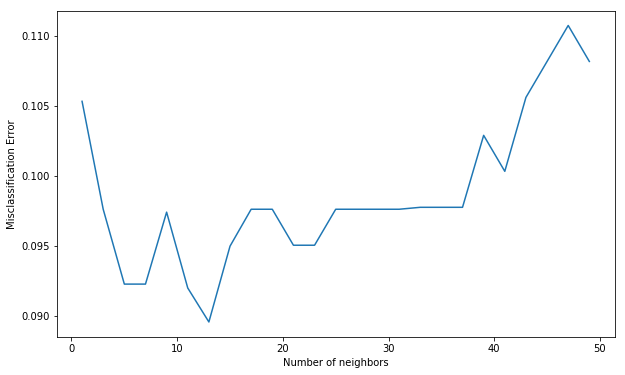

In [144]:
neigh, scores = cross_validate(x_trainMS, y_trainMS)
plotMSE(neigh, scores)

In [145]:
#optimal # neighbors was original k --> did not perform as well as robust scaling

# Use GridSearchCV for hyperparameters 

In [146]:
#List Hyperparameters to tune
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

In [148]:
#Making model using scaled data
clf = GridSearchCV(knn, hyperparameters, cv=10)
best_model = clf.fit(x_trainS,y_trainS)
#Best Hyperparameters Value
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 2
Best n_neighbors: 8


In [150]:
knn_S3 = KNeighborsClassifier(n_neighbors=8, p=2, leaf_size=1)
knn_S3.fit(x_trainS, y_trainS)
score_scaled3 = knn_S2.score(x_testS, y_testS)
score_scaled3

0.973404255319149

In [151]:
((score_scaled3-score_scaled)/score_scaled)*100

0.0

In [152]:
#same score, but did well for more CV's, comparing distance methods and leaf-size

In [153]:
#optimal parameters: k=8, p=2, leaf_size=1

In [155]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer

In [158]:
scalers = {
    "MinMaxScaler": MinMaxScaler(),
    "MaxAbsScaler": MaxAbsScaler(),
    "StandardScaler": StandardScaler(),
    "RobustScaler": RobustScaler(),
    "Normalizer": Normalizer(),
    "QuantileTransformer": QuantileTransformer()
}

In [181]:
def testScalers(df, scaler_dict):
    score_dict = {}
    for name in scaler_dict:
        scaler = scaler_dict.get(name)
        df_copy = df.copy()
        x = df_copy.drop(columns=['diagnosis'])
        features = [[column for column in x.columns]]
        for feature in features:
            df_copy[feature] = scaler.fit_transform(df_copy[feature])
        
        x_copy = df_copy.drop(columns=['diagnosis'])
        y_copy = df_copy['diagnosis']
        x_trainS, x_testS, y_trainS, y_testS = train_test_split(x_copy, y_copy, test_size=0.33, random_state=42) 
        neigh, scores = cross_validate(x_trainS, y_trainS)
        k = optimalK(neigh, scores)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(x_trainS, y_trainS)
        score = knn.score(x_testS, y_testS)
        score_dict[name] = score
    return score_dict

In [182]:
testScalers(df, scalers)

{'MinMaxScaler': 0.9680851063829787,
 'MaxAbsScaler': 0.9680851063829787,
 'StandardScaler': 0.9627659574468085,
 'RobustScaler': 0.973404255319149,
 'Normalizer': 0.9414893617021277,
 'QuantileTransformer': 0.9574468085106383}

In [ ]:
#robust scaler outperforms everything else

# Correlation Heatmap

In [186]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [187]:
features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 
            'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

In [188]:
df_new = df[features]

In [190]:
corr = df_new.corr()

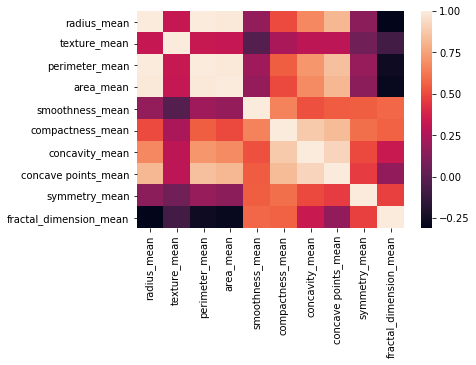

<Figure size 864x1296 with 0 Axes>

In [191]:
sns.heatmap(corr, fmt='.2f')
fig = plt.figure(figsize=(12,18))

In [192]:
#perimeter, area, radius all correlated
#

In [210]:
features_worst = ['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 
            'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

In [211]:
df_worst = df[features_worst]

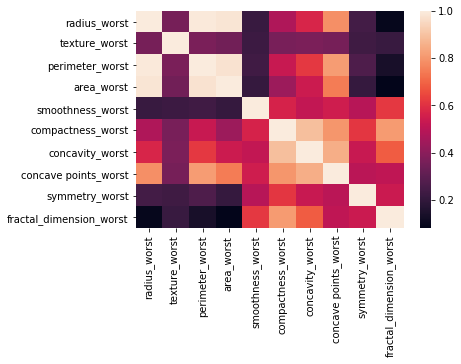

<Figure size 864x1296 with 0 Axes>

In [212]:
corr = df_worst.corr()
sns.heatmap(corr, fmt='.2f')
fig = plt.figure(figsize=(12,18))

In [213]:
#going to use the "worst" measurements to train

# Univariate analysis

In [219]:
diagnosis_type = {1: 'M', 2: 'B'} 
df.diagnosis = [diagnosis_type[item] for item in df.diagnosis] 

In [214]:
from seaborn import lmplot

In [ ]:
#1 = malignant, 2= benign

In [227]:
color_dict = dict({'M':'orangered','B':'mediumblue',})

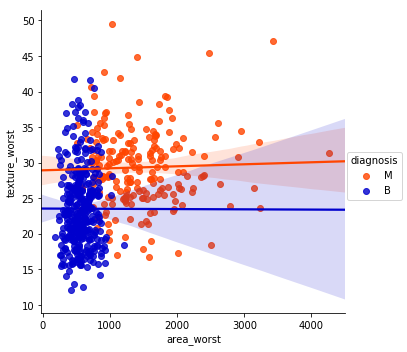

In [233]:
sns.lmplot(x = 'area_worst', y = 'texture_worst', hue = 'diagnosis', data = df, palette = color_dict) 

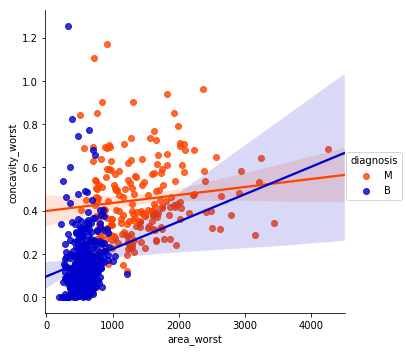

In [234]:
sns.lmplot(x = 'area_worst', y = 'concavity_worst', hue = 'diagnosis', data = df, palette = color_dict) 

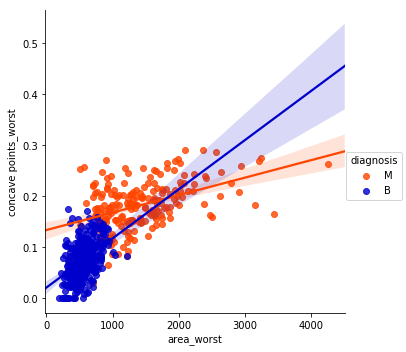

In [235]:
sns.lmplot(x = 'area_worst', y = 'concave points_worst', hue = 'diagnosis', data = df, palette = color_dict) 

In [238]:
def linRegPlots(feature1, others, df):
    color_dict = dict({'M':'orangered','B':'mediumblue',})
    for f2 in others:
        sns.lmplot(x = feature1, y = f2, hue = 'diagnosis', data = df, palette = color_dict)

In [241]:
features = ['texture_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 
            'fractal_dimension_worst']

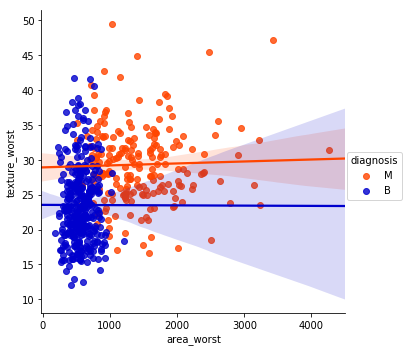

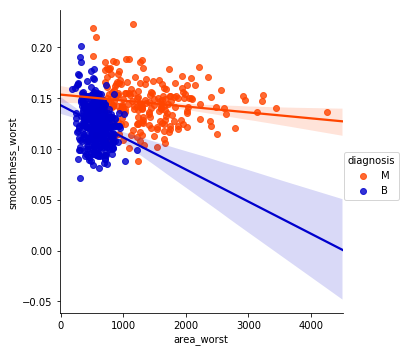

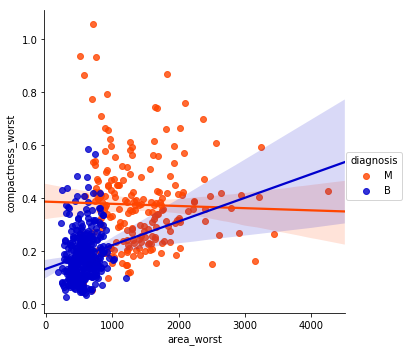

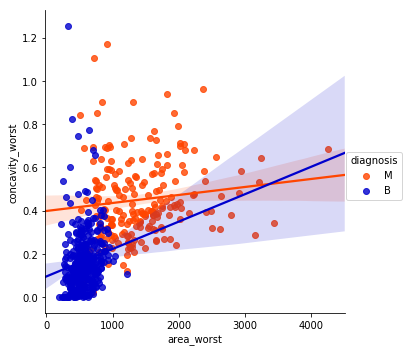

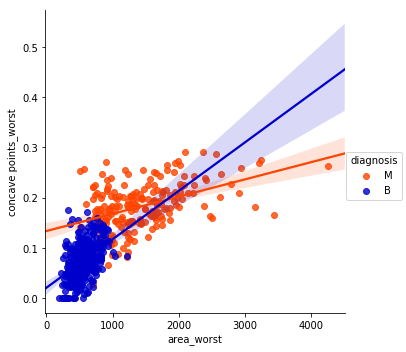

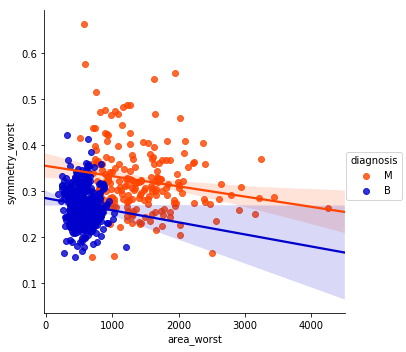

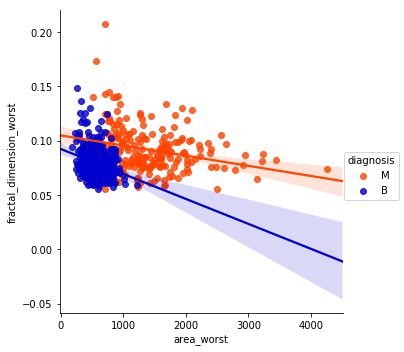

In [242]:
linRegPlots('area_worst', features, df)

In [244]:
features = ['radius_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 
            'fractal_dimension_worst']

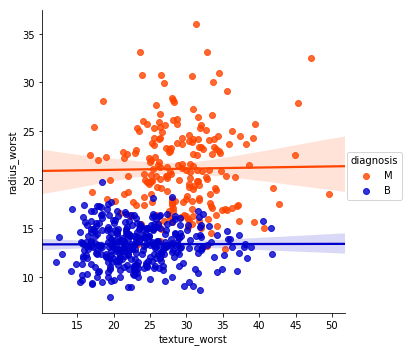

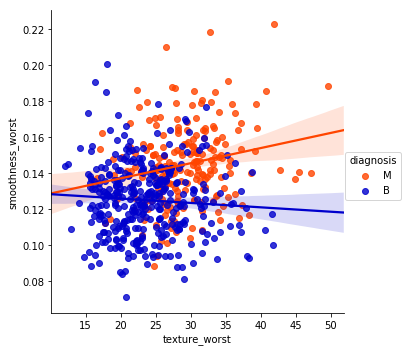

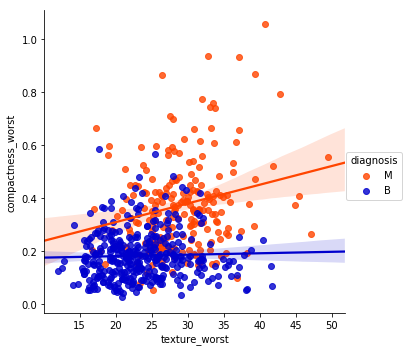

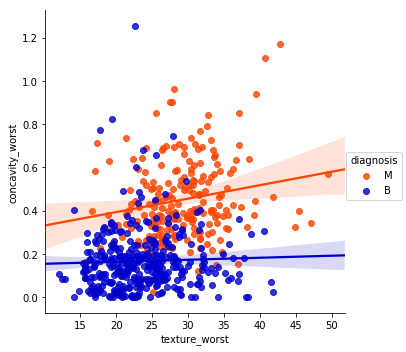

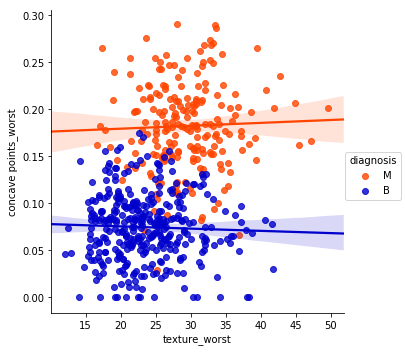

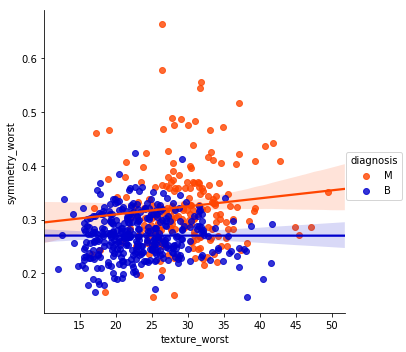

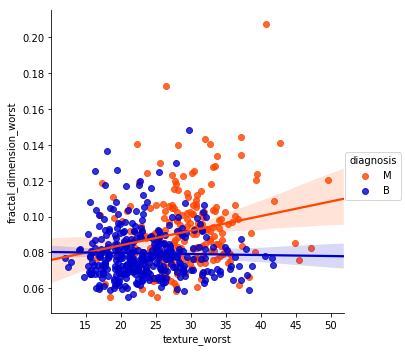

In [245]:
linRegPlots('texture_worst', features, df)

In [246]:
features = ['texture_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 
            'fractal_dimension_worst']

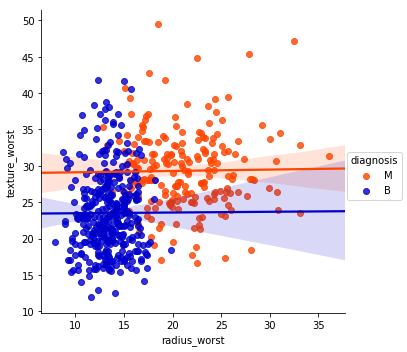

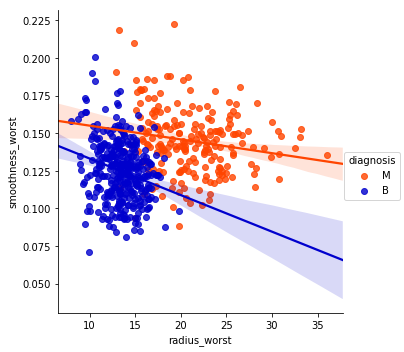

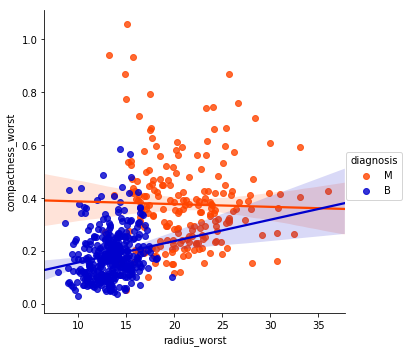

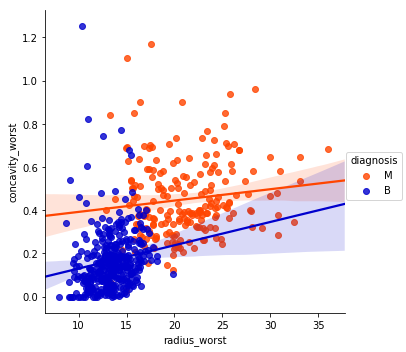

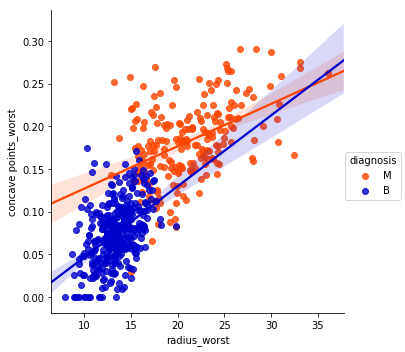

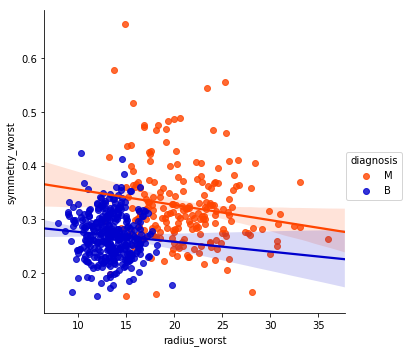

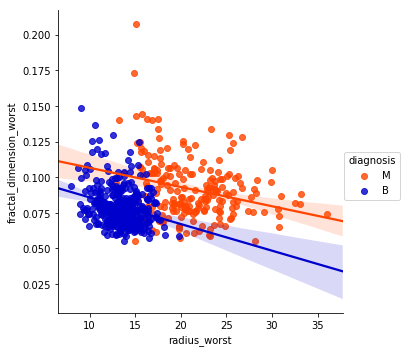

In [247]:
linRegPlots('radius_worst', features, df)

In [248]:
features = ['texture_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 
            'concave points_worst', 'symmetry_worst', ]

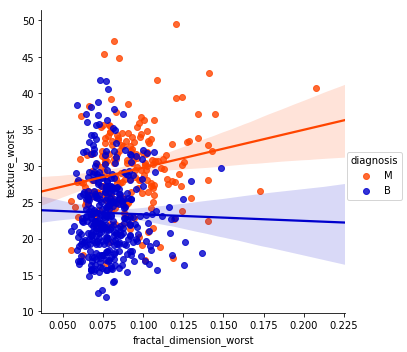

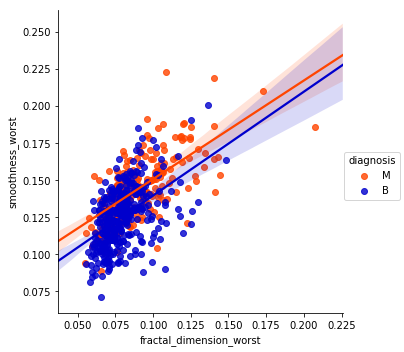

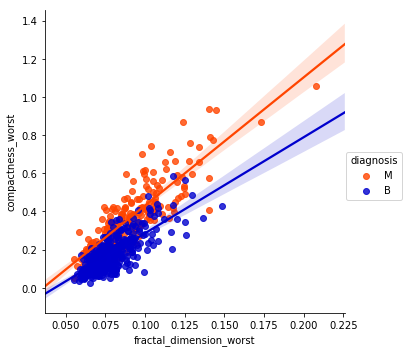

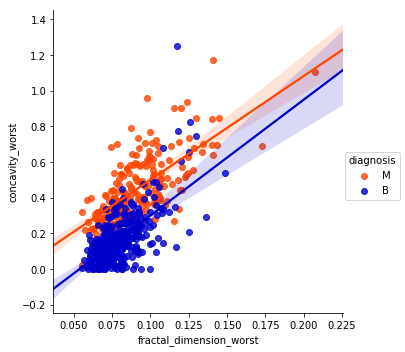

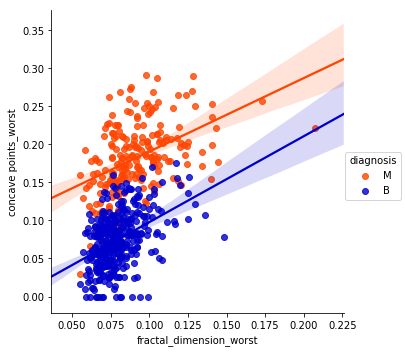

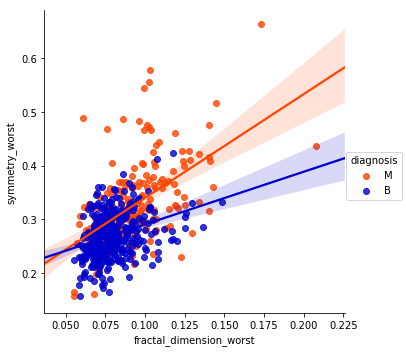

In [249]:
linRegPlots('fractal_dimension_worst', features, df)

In [252]:
features = ['radius_worst', 'area_worst', 'texture_worst', 'compactness_worst', 'concavity_worst', 
            'concave points_worst', 'symmetry_worst']

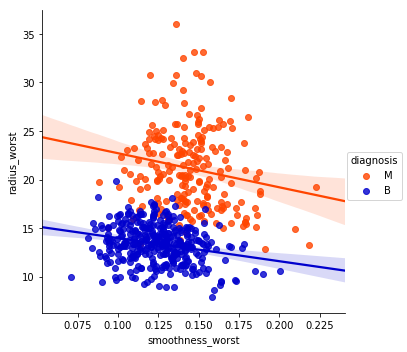

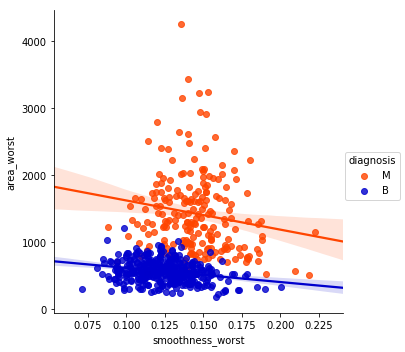

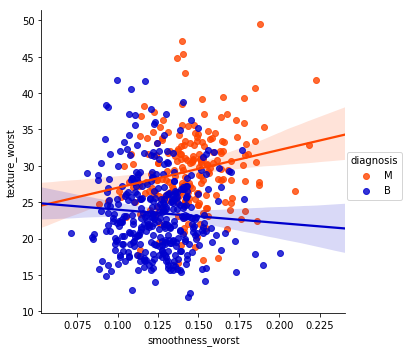

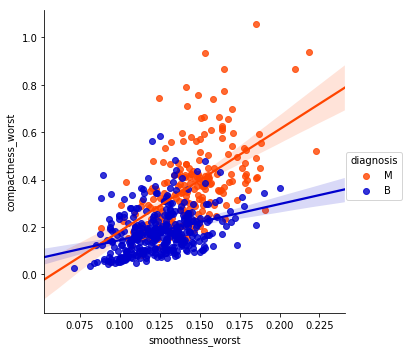

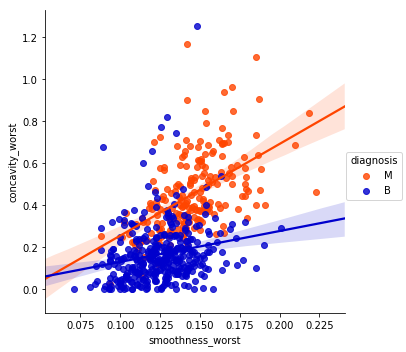

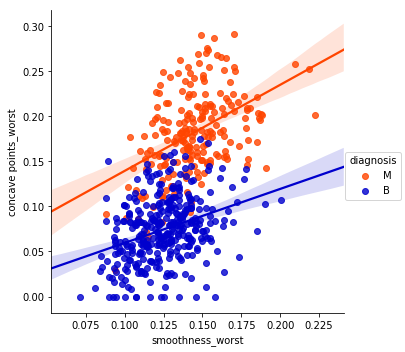

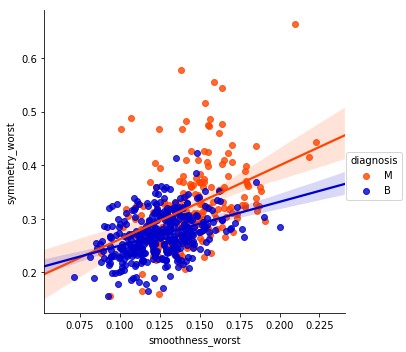

In [253]:
linRegPlots('smoothness_worst', features, df)

In [254]:
features = ['radius_worst', 'concave points_worst', 'smoothness_worst']

In [255]:
x = df[features]
y = df['diagnosis']

In [256]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [257]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(x,y)
knn.score(x_test, y_test)

0.9627659574468085

In [ ]:
#explains most of the data